<a href="https://colab.research.google.com/github/Senek18/assignments/blob/master/Raport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) Importowanie bibliotek i pliku 

In [ ]:
from xml.etree import cElementTree
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dane =pd.read_csv('drive/My Drive/COVID19_open_line_list.csv')
dane
dane1=pd.read_csv('drive/My Drive/COVID19_line_list_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2) Obróbka pliku 

In [ ]:
dane = dane[dane.ID.notnull()]
dane

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13169,13475.0,60-69,male,Nagoya City,Aichi Prefecture,Japan,1.0,NaN,NaN,NaN,27.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,NaN,#207,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/content/10906000/000601...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13170,13476.0,40-49,female,NaN,Osaka,Japan,1.0,NaN,NaN,NaN,19.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,NaN,#208,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/content/10906000/000601...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13171,13477.0,0-10,female,NaN,Osaka,Japan,1.0,NaN,NaN,NaN,NaN,NaN,28.02.2020,NaN,NaN,NaN,#209,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/content/10906000/000601...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13172,13478.0,NaN,female,Amsterdam,NaN,Netherlands,1.0,NaN,NaN,NaN,NaN,NaN,28.02.2020,mild,NaN,NaN,returned from Italy this week,NaN,works at Amsterdam UMC Hospital,NaN,NaN,https://nos.nl/artikel/2324942-amsterdamse-cor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dane[["country",'age',"sex",'wuhan(0)_not_wuhan(1)','symptoms','date_confirmation']]

,country,age,sex,wuhan(0)_not_wuhan(1),symptoms,date_confirmation
0,China,30,male,1.0,NaN,22.01.2020
1,China,47,male,1.0,NaN,23.01.2020
2,China,49,male,1.0,NaN,23.01.2020
3,China,47,female,1.0,NaN,23.01.2020
4,China,50,female,1.0,NaN,23.01.2020
...,...,...,...,...,...,...
13169,Japan,60-69,male,1.0,fever (38 ° C),28.02.2020
13170,Japan,40-49,female,1.0,fever (38 ° C),28.02.2020
13171,Japan,0-10,female,1.0,NaN,28.02.2020
13172,Netherlands,NaN,female,1.0,mild,28.02.2020


### 3)Zapytania

Objawy

In [ ]:
symptoms = dane[['ID','symptoms']]
symptoms=symptoms[symptoms.symptoms.notnull()]
symptoms

,ID,symptoms
5,6.0,pneumonia
6,7.0,fever
8,9.0,fever
10,11.0,pneumonia
13,14.0,cough
...,...,...
13167,13473.0,fever
13169,13475.0,fever (38 ° C)
13170,13476.0,fever (38 ° C)
13172,13478.0,mild


In [ ]:
sym=symptoms.symptoms
sym=list(sym)
sym=list(set(sym))
sym[4]

'diarrhea, fever, nasal congestion, pleuritic chest pain, sore throat'

In [ ]:
sym

['myalgia, rhinorrhea',
 'fever, cough, phlegm, dyspnea',
 'pneumonitis',
 'fever 39.3',
 'diarrhea, fever, nasal congestion, pleuritic chest pain, sore throat',
 'sore throat',
 'pneumonia',
 'no symptoms',
 'vomiting, cough, fever (38.2 ℃), sore throat',
 'fever, pharyngeal discomfort',
 'cough, dyspnea, fever',
 'fever, muscular soreness, rigor',
 'cough, fever, shortness of breath',
 'cough, discomfort, fever, other symptoms',
 'fever, sore throat, sputum',
 'fever (39 ° C), joint pain',
 'fever, pneumonia, sore throat',
 'fever (38.3 ℃)',
 'physical discomfort',
 'nausea, vomiting',
 'fever; cough; fatigue; nausea',
 'fever (39.5 ℃), malaise',
 'fever; nasal congestion; runny nose; sore throat; cough',
 'chills, fever, muscle aches, other symptoms',
 'cough, dyspnea',
 'fever',
 'fever, full body slump',
 'fever, weak',
 'fatigue, fever, headache',
 'fever 38.3',
 'fever; runny nose',
 'fever (37.0 ℃), fever (38.7 ℃)',
 'fever (37.4 ° C), pneumonia',
 'headache; dry mouth',
 'seve

Ile zarażonych jest kobiet, a ilu zarażonych jest mężczyzn




In [ ]:
def infected_sex(gender):
  df = dane[['ID','sex']]
  df = df.loc[df['sex']== gender].count()[1]
  print("Number of infected",gender,'=',df)

In [ ]:
infected_sex('male')

Number of infected male = 703


In [ ]:
infected_sex('female')

Number of infected female = 551


Ile jest osob chorych w danym wieku

In [ ]:
wiek=dane[dane.age.notnull()]
wiek

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13167,13473.0,60-69,male,Sapporo City,Hokkaido,Japan,1.0,NaN,NaN,NaN,18.02.2020,28.02.2020,28.02.2020,fever,NaN,NaN,#206/Hokkaido 66,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/content/10906000/000601...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13168,13474.0,50-59,male,NaN,Ishikawa,Japan,1.0,NaN,NaN,NaN,NaN,NaN,28.02.2020,NaN,NaN,NaN,asymptomatic carrier,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09857.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13169,13475.0,60-69,male,Nagoya City,Aichi Prefecture,Japan,1.0,NaN,NaN,NaN,27.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,NaN,#207,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/content/10906000/000601...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13170,13476.0,40-49,female,NaN,Osaka,Japan,1.0,NaN,NaN,NaN,19.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,NaN,#208,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/content/10906000/000601...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4)Tagowanie podsumowań o pacjentach

In [ ]:
dane1[['id','summary']]

,id,summary
0,1,First confirmed imported COVID-19 pneumonia pa...
1,2,First confirmed imported COVID-19 pneumonia pa...
2,3,First confirmed imported cases in Zhejiang: pa...
3,4,new confirmed imported COVID-19 pneumonia in T...
4,5,new confirmed imported COVID-19 pneumonia in T...
...,...,...
1080,1081,"new COVID-19 patient confirmed in Austria: 24,..."
1081,1082,new COVID-19 patient confirmed in Afghanistan:...
1082,1083,new COVID-19 patient confirmed in Algeria: mal...
1083,1084,new COVID-19 patient confirmed in Croatia: mal...


In [ ]:
Sum=dane1.summary
Sum

0       First confirmed imported COVID-19 pneumonia pa...
1       First confirmed imported COVID-19 pneumonia pa...
2       First confirmed imported cases in Zhejiang: pa...
3       new confirmed imported COVID-19 pneumonia in T...
4       new confirmed imported COVID-19 pneumonia in T...
                              ...                        
1080    new COVID-19 patient confirmed in Austria: 24,...
1081    new COVID-19 patient confirmed in Afghanistan:...
1082    new COVID-19 patient confirmed in Algeria: mal...
1083    new COVID-19 patient confirmed in Croatia: mal...
1084    new COVID-19 patient confirmed in Switzerland:...
Name: summary, Length: 1085, dtype: object

In [ ]:
import re 
Sum=[re.sub("<.+?>"," ",str(a)) for a in Sum]
Sum=[a.lower() for a in Sum]
Sum

['first confirmed imported covid-19 pneumonia patient in shenzhen (from wuhan): male, 66, shenzheng residence, visited relatives in wuhan on 12/29/2019, symptoms onset on 01/03/2020, returned to shenzhen and seek medical care on 01/04/2020, hospitalized on 01/11/2020, sample sent to china cdc for testing on 01/18/2020, confirmed on 01/19/2020. 8 others under medical observation, contact tracing ongoing.',
 'first confirmed imported covid-19 pneumonia patient in shanghai (from wuhan): female, 56, wuhan residence, arrived in shanghai from wuhan on 01/12/2020, symptom onset and visited fever clinic on 01/15/2020, laboratory confirmed on 01/20/2020',
 'first confirmed imported cases in zhejiang: patient is male, 46, lives in wuhan, self-driving from wuhan to hangzhou on 01/03/2020, symptom onset 01/04/2020, hospitalized on 01/17/2020, sample deliver to china cdc for testing on 01/20/2020, test positive on 01/21/2020.',
 'new confirmed imported covid-19 pneumonia in tianjin: female, age 60,

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
Sum = [nltk.word_tokenize(a) for a in Sum]

In [ ]:
import string
Sum = [[w for w in a if w not in string.punctuation]for a in Sum]

In [ ]:
Sum = [[w for w in a if w not in nltk.corpus.stopwords.words("english")]for a in Sum]

In [ ]:
stemmer = nltk.PorterStemmer()
Sum = [[stemmer.stem(w) for w in a]for a in Sum]

In [ ]:
Sum = [' '.join(x) for x in Sum]

In [ ]:
Sum

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
c = CountVectorizer(token_pattern='(?u)\\b\\w+\\b',min_df=3,max_df=0.5)

dtm = c.fit(Sum)
art = dtm.transform(Sum)
art

<1085x457 sparse matrix of type '<class 'numpy.int64'>'
	with 13371 stored elements in Compressed Sparse Row format>

In [ ]:
def top_words(M,dtm,k):
  words=np.array(dtm.get_feature_names())
  return(np.array([words[np.squeeze(np.array(np.argsort(M[i,:].todense())))[-k:]]for i in range(M.shape[0])]))

In [ ]:
topWords=top_words(art,dtm,10)

In [ ]:
topWords[0]

array(['rel', 'pneumonia', 'onset', 'observ', 'resid', 'wuhan',
       'shenzhen', 'medic', '2020', '01'], dtype='<U12')

In [ ]:
dane1.summary[0]

'First confirmed imported COVID-19 pneumonia patient in Shenzhen (from Wuhan): male, 66, shenzheng residence, visited relatives in Wuhan on 12/29/2019, symptoms onset on 01/03/2020, returned to Shenzhen and seek medical care on 01/04/2020, hospitalized on 01/11/2020, sample sent to China CDC for testing on 01/18/2020, confirmed on 01/19/2020. 8 others under medical observation, contact tracing ongoing.'

### 5)Analiza wieku zarażonych

In [ ]:
dane1['age']

0       66.0
1       56.0
2       46.0
3       60.0
4       58.0
        ... 
1080    24.0
1081    35.0
1082     NaN
1083     NaN
1084    70.0
Name: age, Length: 1085, dtype: float64

In [ ]:
df=dane1[dane1.age.notnull()]
wiek =list(df.age)
for i in range(0,843):
  wiek[i]=int(wiek[i])
wiek

In [ ]:
def NUM_INF_AGE(age):
  num = 0
  for i in range(0,843):
    if int(wiek[i]) == age:
      num = num +1
  return num  

In [ ]:
NUM_INF_AGE(44)

7

Procentowy rozklad w przedziałach wiekowych 


In [ ]:
rozklad=[]
lata=[]
lata1=[]
d=0
w=0
a=10
for x in range(0,99):
  d = d + NUM_INF_AGE(x)
  if x == a :
   rozklad.append(d/843*100)
   d=0
   lata.append('%d-%d' %(w,a))
   a = a+10
   w = w+10
   
rozklad


[2.2538552787663106,
 1.7793594306049825,
 12.455516014234876,
 17.67497034400949,
 15.539739027283511,
 21.70818505338078,
 15.895610913404507,
 8.540925266903916,
 3.9145907473309607]

In [ ]:
lata

['0-10',
 '10-20',
 '20-30',
 '30-40',
 '40-50',
 '50-60',
 '60-70',
 '70-80',
 '80-90']

In [ ]:
df = pd.DataFrame(rozklad,lata)
df

,0
0-10,2.253855
10-20,1.779359
20-30,12.455516
30-40,17.674970
40-50,15.539739
50-60,21.708185
60-70,15.895611
70-80,8.540925
80-90,3.914591


Text(0.5, 0, 'Udział procentowy')

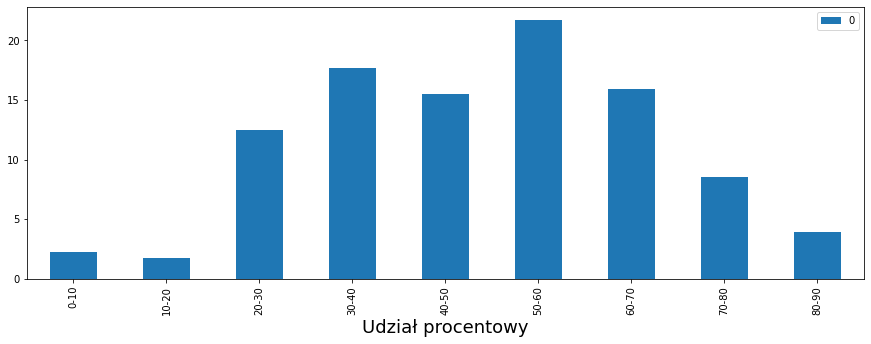

In [ ]:
ax = df.plot.bar(rot=90)
ax.set_xlabel('Udział procentowy',fontsize = 18)